In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load and Preview Predictions

## This script loads the predicted conversion rates from 'rf_predictions.csv' and displays the first few rows for verification.

In [2]:
# Load the predictions
df = pd.read_csv("rf_predictions.csv")

#  Preview the first few rows
print(" First few rows of predictions:")
display(df.head())

 First few rows of predictions:


,Budget,Duration,Platform,Content_Type,Target_Age,Target_Gender,Region,Clicks,Conversions,CTR,CPC,Success,Actual,Rf_Predicted,LR_Predicted
0,0.196906,0.421053,4,0,2,0,4,0.8464,0.6690,0.0134,0.0005,1,0.0051,0.0051,0.0087
1,0.818844,0.754386,1,2,1,2,1,0.5132,0.4976,0.0020,0.0037,1,0.0062,0.0060,0.0015
2,0.831063,0.157895,4,4,0,2,4,0.6625,0.3430,0.0025,0.0029,1,0.0033,0.0033,-0.0124
3,0.030758,1.000000,3,4,4,1,4,0.3127,0.1566,0.0300,0.0002,1,0.0032,0.0034,0.0071
4,0.241368,0.982456,2,3,2,0,0,0.6190,0.3936,0.0080,0.0009,1,0.0041,0.0043,0.0008


In [3]:
#  Summary statistics of numerical columns
print(" Summary Statistics:")
display(df.describe())

 Summary Statistics:


,Budget,Duration,Platform,Content_Type,Target_Age,Target_Gender,Region,Clicks,Conversions,CTR,CPC,Success,Actual,Rf_Predicted,LR_Predicted
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,0.504031,0.507105,2.075000,1.855000,1.900000,1.065000,2.020000,0.526209,0.487433,0.017231,0.004535,0.900000,0.012021,0.012385,0.013128
std,0.316924,0.285848,1.452558,1.450689,1.421302,0.802493,1.435235,0.294126,0.293151,0.081210,0.007360,0.300753,0.018571,0.019923,0.024444
min,0.000923,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.018200,0.003200,0.000100,0.000000,0.000000,0.000000,0.000100,-0.038700
25%,0.216288,0.280702,1.000000,1.000000,1.000000,0.000000,1.000000,0.268825,0.216550,0.001775,0.000900,1.000000,0.002675,0.002700,-0.004425
50%,0.516803,0.508772,2.000000,2.000000,2.000000,1.000000,2.000000,0.512500,0.480500,0.003150,0.002300,1.000000,0.005850,0.005750,0.012200
75%,0.799909,0.754386,3.000000,3.000000,3.000000,2.000000,3.000000,0.780800,0.751800,0.008000,0.004050,1.000000,0.011900,0.012200,0.028175
max,0.988503,1.000000,4.000000,4.000000,4.000000,2.000000,4.000000,1.000000,0.995000,1.000000,0.046900,1.000000,0.123700,0.150900,0.112300


# Generates histograms for both Linear Regression (LR_Predicted) and Random Forest (Rf_Predicted) to analyze the distribution of predicted conversion rates.

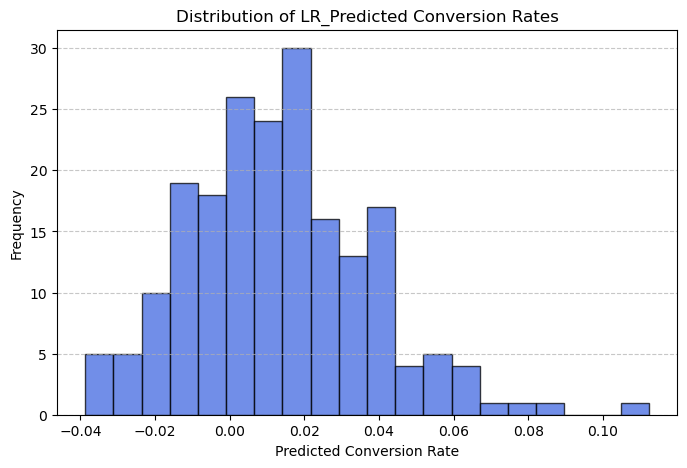

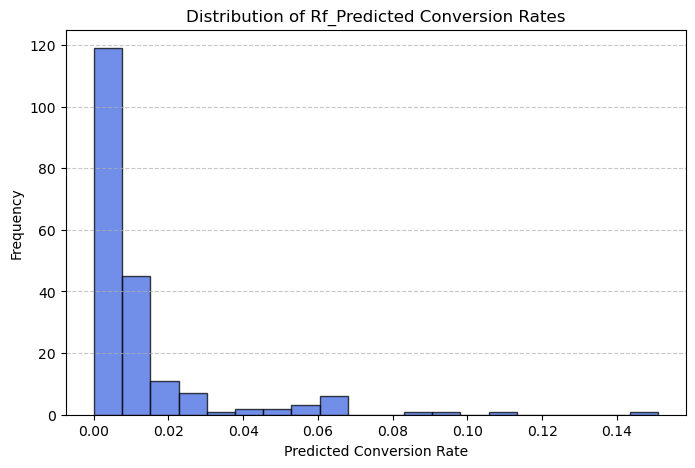

In [4]:
# Histogram (LR_Predicted Conversion Rates)
plt.figure(figsize=(8, 5))
plt.hist(df["LR_Predicted"], bins=20, edgecolor="black", alpha=0.75, color="royalblue")
plt.xlabel("Predicted Conversion Rate")
plt.ylabel("Frequency")
plt.title("Distribution of LR_Predicted Conversion Rates")
plt.grid(axis="y", linestyle="--", alpha=0.7)  # Add a grid for better readability
#plt.savefig("Distribution of LR_Predicted Conversion Rates.png")
plt.show()

# Histogram (Rf_Predicted Conversion Rates)
plt.figure(figsize=(8, 5))
plt.hist(df["Rf_Predicted"], bins=20, edgecolor="black", alpha=0.75, color="royalblue")
plt.xlabel("Predicted Conversion Rate")
plt.ylabel("Frequency")
plt.title("Distribution of Rf_Predicted Conversion Rates")
plt.grid(axis="y", linestyle="--", alpha=0.7)  # Add a grid for better readability
#plt.savefig("Distribution of Rf_Predicted Conversion Rates.png") 
plt.show()

### Analysis: Predicted Conversion Rate Distributions
These histograms show how the Linear Regression (LR) and Random Forest (RF) models distribute their predicted conversion rates.

### Key Differences

LR Predictions are more spread out, meaning the model predicts a wider range of conversion rates.
RF Predictions are highly concentrated near 0, indicating that RF is more conservative with its predictions.

### What This Means
LR might be overestimating conversions in some cases.
RF is more cautious but might miss out on higher conversion potential.
A hybrid approach (adjusting RF hyperparameters or blending models) could improve predictions.

# Box Plots: Predicted Conversion Rate by Platform

## Comparing the total predicted conversion rates across platforms (Linear Regression (LR_Predicted) and Random Forest Rf_Predicted).

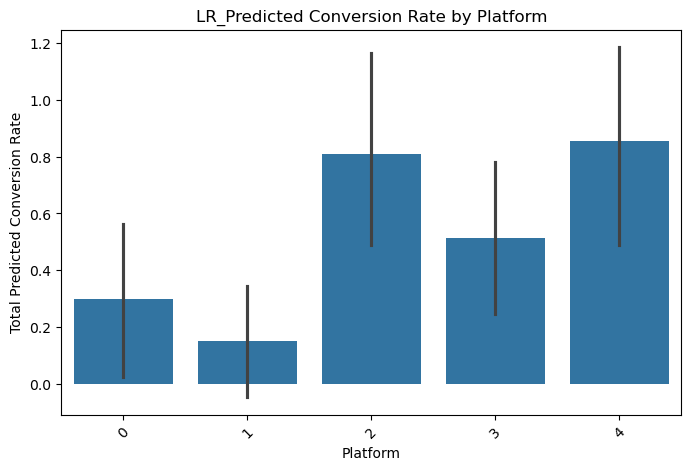

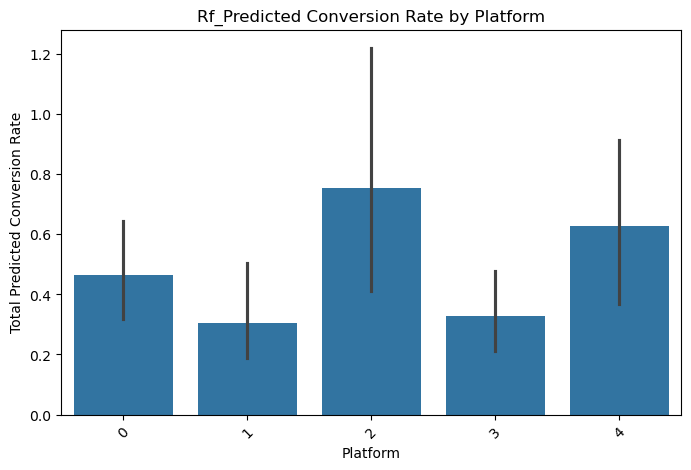

In [5]:
# Box Plot LR_Predicted Conversion Rate
plt.figure(figsize=(8, 5))
sns.barplot(x=df["Platform"], y=df["LR_Predicted"], estimator=sum)
plt.xlabel("Platform")
plt.ylabel("Total Predicted Conversion Rate")
plt.title("LR_Predicted Conversion Rate by Platform")
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
#plt.savefig("LR_Predicted Conversion Rate by Platform.png")
plt.show()

# Box Plot Rf_Predicted Conversion Rate
plt.figure(figsize=(8, 5))
sns.barplot(x=df["Platform"], y=df["Rf_Predicted"], estimator=sum)
plt.xlabel("Platform")
plt.ylabel("Total Predicted Conversion Rate")
plt.title("Rf_Predicted Conversion Rate by Platform")
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
#plt.savefig("Rf_Predicted Conversion Rate by Platform.png")
plt.show()

### Analysis:
These bar charts compare predicted conversion rates for different platforms (0 to 4) using Random Forest (RF) and Linear Regression (LR) models.
### What Stands Out?
Platforms 2 & 4 perform best in both models.
RF has more variation (larger error bars), while LR is more stable but might overestimate.
Platforms 1 & 3 lag behind, meaning they may need a different ad strategy.
### Next Steps
LR for consistency, RF for accuracy—choose based on priorities.
Focus on Platforms 2 & 4 for higher conversions.
Reevaluate Platforms 1 & 3—optimize targeting & budget.

# Feature Correlation Heatmap

### - This heatmap visualizes the correlation between numerical features in the dataset.
### - Helps identify which features strongly impact conversion rates.
### - Darker red/blue indicates stronger positive/negative correlations.
### - Sorting ensures 'Actual' conversion rate is the primary focus.

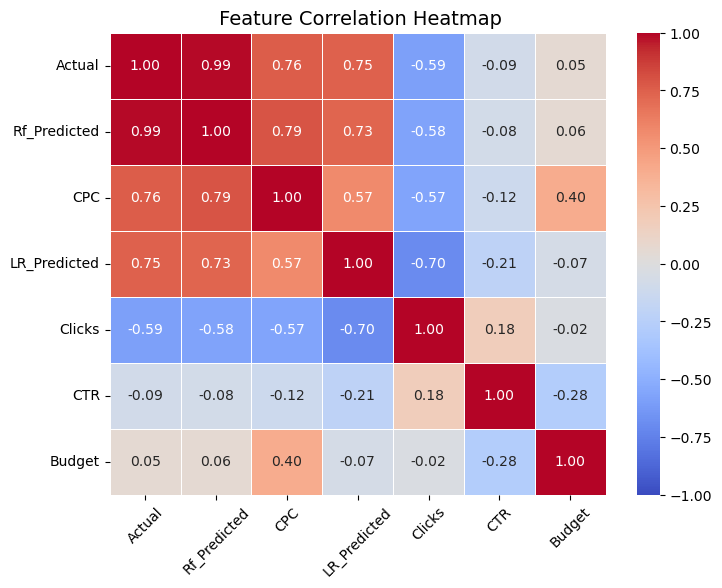

In [6]:
# Load Data
df = pd.read_csv("rf_predictions.csv")

# Select Relevant Numerical Features
numerical_cols = ["Budget", "Clicks", "CTR", "CPC", "Actual", "Rf_Predicted", "LR_Predicted"]
corr_matrix = df[numerical_cols].corr()

# Sort Features Based on Correlation with 'Actual'
sorted_cols = corr_matrix["Actual"].abs().sort_values(ascending=False).index
corr_matrix = corr_matrix.loc[sorted_cols, sorted_cols]

#  Plot the Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, vmin=-1, vmax=1)

#  Labels & Title
plt.title(" Feature Correlation Heatmap", fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
#plt.savefig("Feature Correlation Heatmap.png") 
# Show Plot
plt.show()


### Analysis: Feature Correlation Heatmap
##### This heatmap shows the correlation between different features in the dataset, helping us understand how variables relate to conversion rates.

### Key Takeaways

##### Random Forest (Rf_Predicted) is highly accurate (0.99 correlation with Actual) 
##### Linear Regression (LR_Predicted) is slightly weaker (0.75 correlation with Actual) 
##### CPC (Cost Per Click) has a strong positive correlation with Actual (0.76) → Higher CPC leads to more conversions 
##### Clicks have a negative correlation (-0.59) → More clicks don’t necessarily mean more conversions 
##### Budget has little impact (0.05 correlation) → Simply increasing budget won't guarantee better results
#### Actionable Insights
##### Focus on high-quality clicks rather than maximizing traffic
##### CPC optimization is key – premium ads may perform better
##### Random Forest is the better model but can still be fine-tuned
##### Prioritize high-intent users over maximizing clicks.
##### Invest in high-CPC ads for better conversion rates.
##### A/B test budget strategies to optimize ad spend.